<a href="https://colab.research.google.com/github/alexandraeremia06/Kaggle/blob/main/4_Competitor_web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 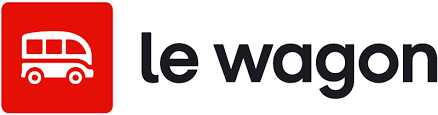

# Get competitor's products and prices info

Naturalia is a health food French company, and one of the main competitors of Greenweez.

In this challenge, you will gather information on Naturalia products to help Greenweez drive its pricing strategy.

## Naturalia website

### BeautifulSoup


Go to the [website](https://www.naturalia.fr/catalogsearch/result/?q=compote) and study the url. What is the endpoint? What is the query parameter ?

> **Your Answer Here (Double click)**


Using `requests` and `bs4`libraries, convert the html code to a BeautifulSoup object and store it in a `soup`variable.

Have a look at the lecture if you're unsure about the syntax.

In [1]:
url = 'https://www.naturalia.fr/catalogsearch/result/?q=compote'

### Investigating the page layout


We want to get information about all the products displayed on the page.

By examining the website's HTML code, determine the HTML tag that contains information for each product.

> **Your Answer Here (Double click)**


Use BeautifulSoup's `find_all()` method to retrieve all **li** tags with the class **item product product-item** and store the results in a variable named `items`.

Have a look at the lecture for guidance.

In [12]:
# your code here:
import requests
from bs4 import BeautifulSoup

url = 'https://www.naturalia.fr/catalogsearch/result/?q=compote'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

items = soup.find_all("li", {"class":"item product product-item"})

What is the type of `items`?


> **Your Answer Here (Double click)**


### Scraping one product information


Store the first item in a variable named `item`.

In [13]:
#your code here
item = items[0]
item

<li class="item product product-item"> <div class="product-item-info" data-container="product-grid">
<p class="product name product-item-name">
<a class="product-item-link" href="https://www.naturalia.fr/produit/compote-peche-allegee-540g">
                                                        Compote de Pêche allégée 540g Bio                         </a>
</p>
<p class="product-item-brand">
                        Coteaux Nantais                    </p>
<div class="products-content">
<div class="product-item-photo">
<a class="product photo" href="https://www.naturalia.fr/produit/compote-peche-allegee-540g" tabindex="-1">
<span class="product-image-container product-image-container-60477">
<span class="product-image-wrapper">
<img alt="Compote de Pêche allégée 540g Bio" class="product-image-photo" height="233" loading="lazy" src="https://media.naturalia.fr/media/catalog/product/cache/c97961dbe2ef8ae9072b778469b58f9a/0/3/03301594002522_a1c1.jpg" width="233"/></span>
</span>
<style>.pro

HTML can be tough to decipher when reading it in the notebook.

Use your browser's console to identify the HTML tag storing the product information (name and url) of the first item. \
Extract it with BeautifulSoup and store the results in a variable named `item_description`.

In [14]:
#find the tag that contains the product name and the url
item.find("a")

<a class="product-item-link" href="https://www.naturalia.fr/produit/compote-peche-allegee-540g">
                                                        Compote de Pêche allégée 540g Bio                         </a>

Now extract the name and url from `item_description`and store them in two variables named `item_name` and `item_url`.


In [18]:
# store the product name
item_name = item.find("a").text.strip()
item_name

# strip strips blank spaces

'Compote de Pêche allégée 540g Bio'

In [19]:
#store the product url
item_url = item.find("a").get("href")
item_url

# get https refference

'https://www.naturalia.fr/produit/compote-peche-allegee-540g'

Repeat the same process to extract the price of the first item, and store it in a variable named `item_price`.


<details>
    <summary>Hint 🔍</summary>

You will be required to do some cleaning with the output, including:
    
- get rid of the unnecessary characters (`strip()`and `replace()` methods can help)
- change the data type

</details>

In [27]:
#your code here
# item.find("span",{"class": "price"}).text.strip(.replace "xaa760,"")
# item.find("span",{"class": "price"}).text.replace((),"")
# item_price = item.find("span", {"class": "price"}).text.split()[0]
# item_price

item_price = float(item.find("span", {"class":"price"}).text.split()[0].replace(",","."))
item_price

7.49

### Scraping all products information

We will now repeat the process to gather the information of all the products displayed on the page.

By re-using your previous code, iterate over all the products and create a list of dictionaries containg all the products information (product name, price and url).

Complete the following code and execute it.

In [30]:
# we have items containing all jams
# we want to get the name, url, price of each product
# we want to save these 3 things about each jam
# ultimately we want to have a df that has as many rows as we have jams on the site

new_list = []
for item in items:
  item_name = item.find("a").text.strip()
  item_url = item.find("a").get("href")
  item_price = float(item.find("span", {"class":"price"}).text.split()[0].replace(",","."))

  print(item_name, item_price, item_url)
  print("n")

  product_info = {"name": item_name,"price":item_price, "url":item_url}
  new_list.append(product_info)

# import pandas as pd

# # all products info
# products = []

# # iterate over items
# for item in items:

#     # to be completed


#     # product_info dict

#     # append product_info to products

# df = pd.DataFrame(products)
# df

Compote de Pêche allégée 540g Bio 7.49 https://www.naturalia.fr/produit/compote-peche-allegee-540g
n
Compote Fraise 315g Bio 5.9 https://www.naturalia.fr/produit/compote-fraise-315g
n
Compote de Pêche 725G Bio 8.95 https://www.naturalia.fr/produit/compote-peche-725g
n
Compote Pommes Family 935g Bio 5.95 https://www.naturalia.fr/produit/compote-pommes-family-935g
n
Compote de Pomme & Châtaigne 700g +20% Bio 5.05 https://www.naturalia.fr/produit/compote-pomme-chataigne-20
n
Compote Abricot 725G Bio 8.75 https://www.naturalia.fr/produit/compote-abricot-725g
n
Compote de pêches plates 315G Bio 4.49 https://www.naturalia.fr/produit/compotes-peches-plates-315g
n
Compote Pomme Poire Maxi Format 1.050kg Bio 8.65 https://www.naturalia.fr/produit/puree-pomme-poire-1-05kg
n
Compote de Pomme Maxi Format 1.050kg Bio 6.95 https://www.naturalia.fr/produit/puree-pomme-1-05kg
n
Compote de pomme & châtaigne 4x100G Bio 4.2 https://www.naturalia.fr/produit/compot-pomme-chataigne-4x100g
n
Purée de carotte 

Congratulations! You just scraped your first web page using Python! 🤖

---

Did we scrape all the products though ?


> **Your Answer Here (Double click)**


### Scraping all the pages

Use your web browser inspector to identify the HTML tag containing the URL for the next page. \
Store this in a variable named `next_page_item`

In [32]:
# your code here
next_page_item = soup.find("a", {"class": "action next"})
next_page_item

<a class="action next" href="https://www.naturalia.fr/catalogsearch/result/index/?p=2&amp;q=compote" title="Suivant">
<i aria-hidden="true" class="fa fa-chevron-circle-right"></i>
</a>

Now extract the URL from it and store it in a variable named `next_page_url`.

In [34]:
#your code here
next_page_url = next_page_item.get("href")
next_page_url

'https://www.naturalia.fr/catalogsearch/result/index/?p=2&q=compote'

Now try to repeat the `next_page_item`instructions **on the last page**. Does it work ?

In [35]:
# simulate being on the last page (e.g., page 5 for 'compote')
last_page_url = 'https://www.naturalia.fr/catalogsearch/result/index/?p=5&q=compote'
response_last_page = requests.get(last_page_url)
soup_last_page = BeautifulSoup(response_last_page.text, 'html.parser')

# trying to find the 'next page' item on the last page
next_page_item_on_last_page = soup_last_page.find("a", {"class": "action next"})

print(next_page_item_on_last_page)


None


In [ ]:
# your code here


The output "None" confirms that there is no 'next page' button on the last page of the search results.


There is no "Next page" button on the last page (obviously). Therefore, when we try to locate it, the`find()` method outputs a None value.

We can actually use that to our advantage in a `while`loop !


---

**Hard Mode**

By re-using all of the previous steps, create a final function that will take a `search_term` as a parameter (like we did with "compote") and will return a DataFrame containing products information from all the pages.


<details>
    <summary>Hint 🔍 </summary>

You can use a while loop to iterate over pages until there is no next page anymore.

</details>

In [ ]:
def naturalia_web_scraper(search_term):

    url = "https://www.naturalia.fr/catalogsearch/result/?q=" + search_term

    next_page = True

    #all products info

    products=[]

    while(next_page): #as long as there is a next page, the loop will iterate

        #get items
        #your code here


        # iterate over items

            #your code here


            # product_info dict


            # append product_info to products


            # test for next page
            #your code here


    # combine all products in a single DataFrame
    df = pd.DataFrame(products)

    return df


#test your function

naturalia_web_scraper("compote")


Congratulations ! 🎉

## Bonus: Scraping Walmart ?



Imagine we want to scrape product information from [this url](https://www.walmart.ca/parcourir/epicerie/collations-bonbons/coupes-compote-pommes-puree-fruits/10019-6000194328523-6000195492964) now.

Run the following line of code.

In [31]:
url = "https://www.walmart.ca/fr/browse/epicerie/collations-bonbons/coupes-compote-pommes-puree-fruits/10019_6000194328523_6000195492964"

response = requests.get(url)
response.text

'<!DOCTYPE html>\n<html lang=en><head> <meta charset=utf-8 /> <meta name=viewport content="width=device-width, initial-scale=1"/> <title>Verify Your Identity</title>  <script>function getUrlVars(){var vars={};var parts=window.location.href.replace(/[?&]+([^=&]+)=([^&]*)/gi,function(m,key,value){vars[key]=value;});return vars;}\nfunction getUrlParam(parameter,defaultvalue){var urlparameter=defaultvalue;if(window.location.href.indexOf(parameter)>-1){urlparameter=getUrlVars()[parameter];}\nreturn urlparameter;}\nfunction sanitizeUuid(uuid){var regex=new RegExp("^\\\\b[0-9a-f]{8}\\\\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\\\\b[0-9a-f]{12}\\\\b$","g");var match=regex.exec(uuid);return match!=null?uuid:"";}\nfunction addBlockID(){var blockId=sanitizeUuid(getUrlParam(\'uuid\',\'\'));document.getElementById("blockId1").innerHTML="ID: "+blockId;}\nfunction getCookie(name){var cookieArr=document.cookie.split(";");for(var i=0;i<cookieArr.length;i++){var cookiePair=cookieArr[i].split("=");if(name==

We cannot use BeautifulSoup, because Walmart is using an anti Web Scraping system, which messes with the HTML parsing.

We would need some advanced scraping libraries such as [Selenium](https://www.selenium.dev/) to proceed (more on that during the recap).
